# OUR ROOT FILE

Our ROOT file `AO2Dtree.root` contains many T-directories which are chunk of data. Each directory contains 3 T-Trees:
* `O2collision_001`: PV (primary vertex) information in global reference system
* `O2filtertrack`:
* `O2filtertrackextr`:

---

O2collision_001 tree (Primary Vertex / Collision-level information) contains these variables:
- `fIndexBCs`: Index of the bunch crossing (one bunch of protons collides about every 25 ns) associated with the collision 
- `fPosX`, `fPosY`, `fPosZ`: Coordinates of the primary vertex in the global reference system (in cm?). These give the collision point in space:
  $$ \vec{r}_{\text{PV}} = (fPosX, fPosY, fPosZ) $$
- `fCovXX`, `fCovXY`, `fCovYY`, `fCovXZ`, `fCovYZ`, `fCovZZ`: Elements of the 3x3 covariance matrix of the primary vertex position. They describe the uncertainties and correlations in the vertex position measurement.
- `fFlags`: Internal flag bitfield used by ALICE software. 
- `fChi2`: Chi-squared value of the vertex fit. Lower values indicate better fits. You can use this to select good-quality primary vertices.
- `fNumContrib`: Number of tracks used to reconstruct the primary vertex. A larger number typically indicates a more reliable vertex. You might apply a cut like fNumContrib > 3.
- `fCollisionTime`: Estimated collision time (in nanoseconds?), useful for time-of-flight (TOF) based particle identification.
- `fCollisionTimeRes`: Uncertainty (resolution) of the collision time measurement, also relevant for TOF PID.

---

O2filtertrack contains the basic track parameters, evaluated at the point of closest approach (PCA) to the primary vertex (PV), and expressed in the tracking reference system:
* `fIndexCollisions` : Index linking each track to a collision (entry in `O2collision_001` tree).
                     You can use it to match tracks to their corresponding primary vertex.
* `fIsInsideBeamPipe` : Integer flag indicating whether the track is within the beam pipe region.
                      Helps exclude unphysical or background tracks.
* `fTrackType` : Type of track (usually 0 = global track, other values for special cases).
               Can be used for track selection or filtering.
* `fX` : X coordinate of the track at the PCA to the PV, in the tracking reference system.
* `fAlpha` : Local azimuthal angle of the track (rotation angle of the tracking frame).
           Needed for coordinate transformation; 
* `fY`, `fZ` : Y and Z coordinates of the track at the PCA to the PV, in the tracking reference system.
* `fSnp` : `sin(ϕ)` at PCA — where ϕ is the azimuthal angle of the track direction.
         This helps describe the direction of the track in the transverse plane.
* `fTgl` : Tangent of the dip angle (λ), where λ is the angle between the track and the transverse plane.
         Related to the slope in the Z direction: `fTgl = dz/dl`, where `l` is the path length.
* `fSigned1Pt` : Inverse transverse momentum with sign: `signed(1/pT)`.
               The sign encodes the curvature direction → gives charge information.
               You can compute `pT = 1 / abs(fSigned1Pt)`.

---

O2filtertrackextr contains:
* `fPt` : Transverse momentum of the track, in GeV/c.
        This is a directly usable quantity, unlike `fSigned1Pt` in the previous table.
* `fEta` : Pseudorapidity (η) of the track, defined as:
         η = -ln[tan(θ/2)], where θ is the polar angle with respect to the beam axis (z).
         Used instead of θ because η is Lorentz-invariant under boosts along z.
* `fCharge` : Electric charge of the particle, in units of elementary charge (±1).
* `fDcaXY` : Distance of closest approach (DCA) to the primary vertex in the transverse (x-y) plane.
           Useful for identifying secondary particles (from decays) vs. primary particles.
* `fDcaZ` : DCA in the longitudinal (z) direction.
* `fSigmaDcaXY2` : Variance (i.e., squared uncertainty) on `fDcaXY`.
* `fSigmaDcaZ2` : Variance on `fDcaZ`.
* `fNsigmaTPCpi`, `fNsigmaTPCka`, `fNsigmaTPCpr` :
    Number of sigmas (standard deviations) by which the measured TPC signal (dE/dx) differs
    from the expected value for a pion, kaon, or proton, respectively.
    → Used for Particle Identification (PID) with the TPC.
* `fNsigmaTOFpi`, `fNsigmaTOFka`, `fNsigmaTOFpr` :
    Same as above, but for the TOF detector (based on time-of-flight measurements).


---

# TESTING UPROOT

In [2]:
import numpy as np
import pandas as pd
import awkward as ak
import uproot
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [3]:
path = "AO2Dtree.root"
file = uproot.open(path)
file.classnames()

{'DF_2300238590827776;1': 'TDirectory',
 'DF_2300238590827776/O2collision_001;1': 'TTree',
 'DF_2300238590827776/O2filtertrack;1': 'TTree',
 'DF_2300238590827776/O2filtertrackextr;1': 'TTree',
 'DF_2300238590872672;1': 'TDirectory',
 'DF_2300238590872672/O2collision_001;1': 'TTree',
 'DF_2300238590872672/O2filtertrack;1': 'TTree',
 'DF_2300238590872672/O2filtertrackextr;1': 'TTree',
 'DF_2300238590885888;1': 'TDirectory',
 'DF_2300238590885888/O2collision_001;1': 'TTree',
 'DF_2300238590885888/O2filtertrack;1': 'TTree',
 'DF_2300238590885888/O2filtertrackextr;1': 'TTree',
 'DF_2300238590919936;1': 'TDirectory',
 'DF_2300238590919936/O2collision_001;1': 'TTree',
 'DF_2300238590919936/O2filtertrack;1': 'TTree',
 'DF_2300238590919936/O2filtertrackextr;1': 'TTree',
 'DF_2300238590971008;1': 'TDirectory',
 'DF_2300238590971008/O2collision_001;1': 'TTree',
 'DF_2300238590971008/O2filtertrack;1': 'TTree',
 'DF_2300238590971008/O2filtertrackextr;1': 'TTree',
 'DF_2300238590997568;1': 'TDirecto

In [3]:
file["DF_2300238590827776/O2filtertrackextr"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
fPt                  | float                    | AsDtype('>f4')
fEta                 | float                    | AsDtype('>f4')
fCharge              | int32_t                  | AsDtype('>i4')
fDcaXY               | float                    | AsDtype('>f4')
fDcaZ                | float                    | AsDtype('>f4')
fSigmaDcaXY2         | float                    | AsDtype('>f4')
fSigmaDcaZ2          | float                    | AsDtype('>f4')
fNsigmaTPCpi         | float                    | AsDtype('>f4')
fNsigmaTPCka         | float                    | AsDtype('>f4')
fNsigmaTPCpr         | float                    | AsDtype('>f4')
fNsigmaTOFpi         | float                    | AsDtype('>f4')
fNsigmaTOFka         | float                    | AsDtype('>f4')
fNsigmaTOFpr         | float                    | AsDtype(

In [119]:
print( type(file["DF_2300238590827776/O2collision_001"].arrays(library="pd")) )
print('      è un pandas dataframe!!')
file["DF_2300238590827776/O2filtertrack"].arrays(library="pd")

<class 'pandas.core.frame.DataFrame'>
      è un pandas dataframe!!


,fIndexCollisions,fIsInsideBeamPipe,fTrackType,fX,fAlpha,fY,fZ,fSnp,fTgl,fSigned1Pt
0,0,1,1,0.030319,-3.031685,0.015100,-4.127120,-3.275914e-07,-0.424477,-1.322989
1,0,1,1,-0.017226,-0.322267,-0.030717,-4.129672,-9.804604e-08,0.634659,1.508142
2,0,1,1,0.027611,-3.135348,0.037229,-4.130205,5.807100e-07,0.479332,-2.150477
3,0,1,1,0.036497,-2.713416,0.027809,-4.132064,1.633476e-06,-0.178895,-2.840999
4,2,1,1,-0.019782,-0.443220,-0.029422,-8.384316,7.599526e-07,0.293518,-2.301674
...,...,...,...,...,...,...,...,...,...,...
67068,12380,1,1,0.021540,2.888159,0.036426,4.472124,-3.495668e-07,-0.552475,2.048780
67069,12381,1,1,-0.038396,1.386600,0.032234,2.403407,4.365330e-07,0.452370,-1.218866
67070,12381,1,1,-0.049607,0.763879,0.001972,2.406586,-5.677445e-07,0.427406,1.646495
67071,12381,1,1,0.048661,-2.649409,0.030211,2.440591,-7.160132e-07,-0.416076,3.205161


---

# EX 1 - TRANSVERSE MOMENTUM $p_T$
Produce histogram of track pt distribution, first from a single DF, than using all DF in the file. Check that pT and 1\abs(fSigned1Pt) give the same.

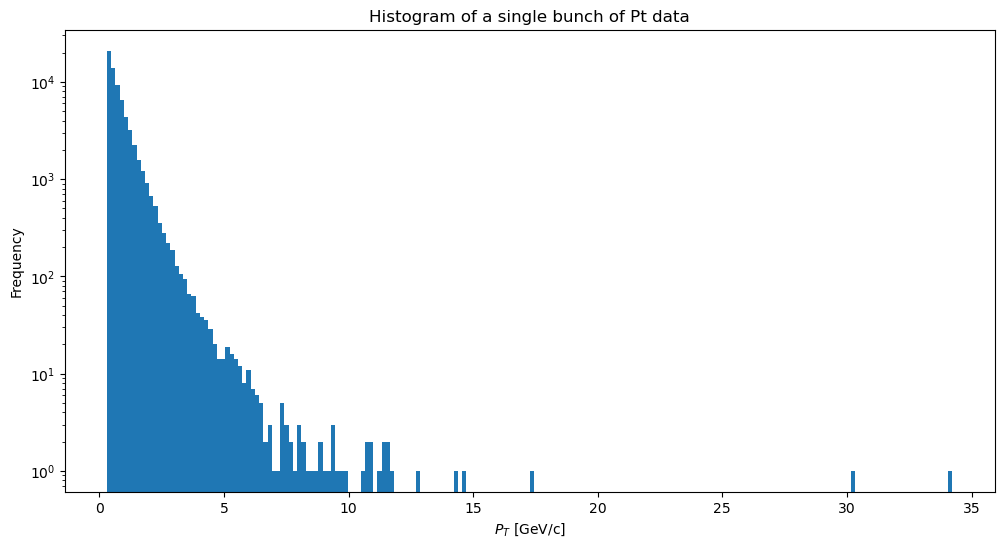

In [5]:
# let's first do it with a single T-directory
df_pt_1 = file["DF_2300238590827776/O2filtertrackextr"].arrays(library="pd")
arr = np.array( df_pt_1['fPt'] )

plt.figure(figsize=(12,6))
plt.hist(arr, bins=200, log=True)
plt.title('Histogram of a single bunch of Pt data')
plt.xlabel(r'$P_T$ [GeV/c]')
plt.ylabel('Frequency')
plt.show()

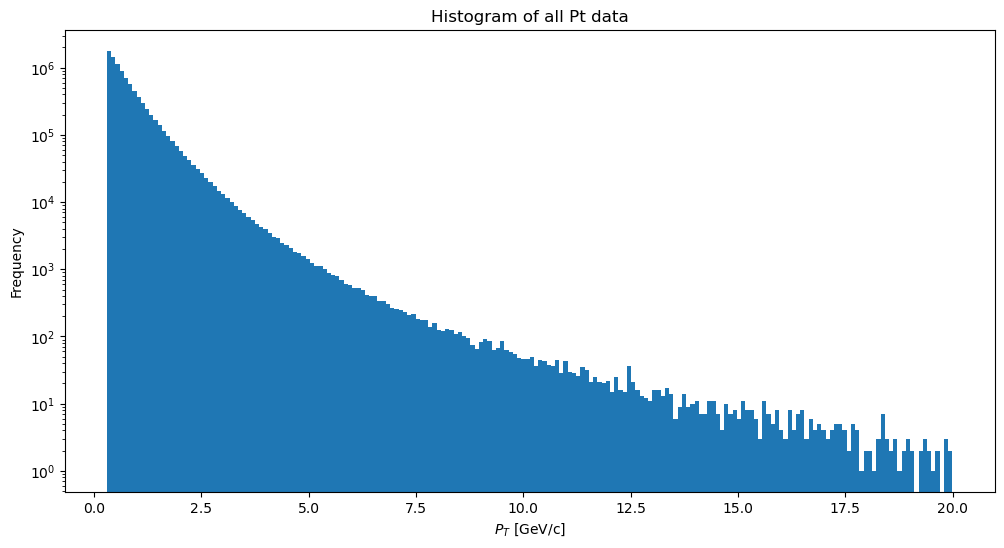

In [11]:
# now with all T-directories:

# merging all directories:
names = file.keys(filter_name=r"*O2filtertrackextr")
values = [file[item]["fPt"].array(library="np") for item in names]
all_pt = np.concatenate(values)
# filtering
all_pt_filter = all_pt[ all_pt<20 ]

# plotting:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.hist(all_pt_filter, bins=200, log=True)
ax.set_title('Histogram of all Pt data')
ax.set_xlabel(r'$P_T$ [GeV/c]')
ax.set_ylabel('Frequency')
plt.show()

In [12]:
len(all_pt)

9126260

In [13]:
# confronting with fSigned1Pt:
names = file.keys(filter_name=r"*O2filtertrack")
values_signed = [ 1/abs( file[item]["fSigned1Pt"].array(library="np") ) for item in names ]
all_pt_signed = np.concatenate(values_signed)

In [14]:
len(all_pt_signed)

9126260

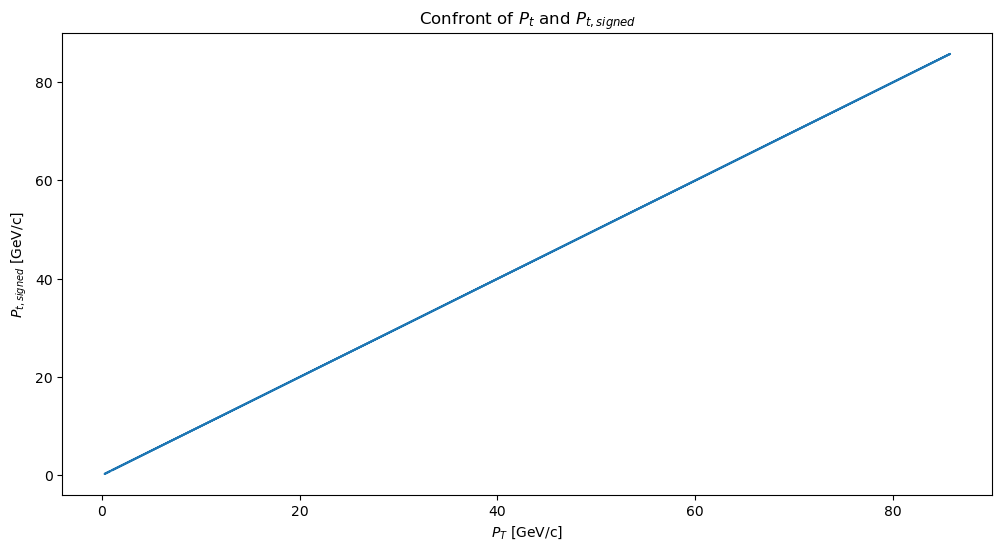

In [15]:
# plotting:
plt.figure(figsize=(12,6))
plt.plot(all_pt, all_pt_signed)
plt.title(r'Confront of $P_t$ and $P_{t,signed}$')
plt.xlabel(r'$P_T$ [GeV/c]')
plt.ylabel(r'$P_{t,signed}$ [GeV/c]')
plt.show()

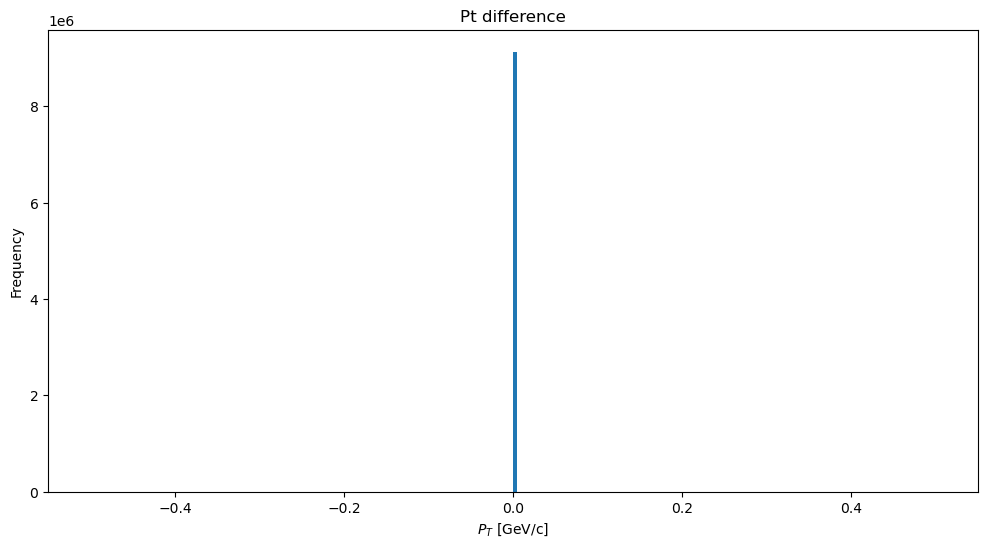

In [21]:
pt_diff = all_pt - all_pt_signed

# plotting:
plt.figure(figsize=(12,6))
plt.hist(pt_diff, bins=200)
plt.title('Pt difference')
plt.xlabel(r'$P_T$ [GeV/c]')
plt.ylabel('Frequency')
plt.show()

---

# EX 2 - produce plots with TPC and TOF PID information

### TPC $pi$ - example of one directory

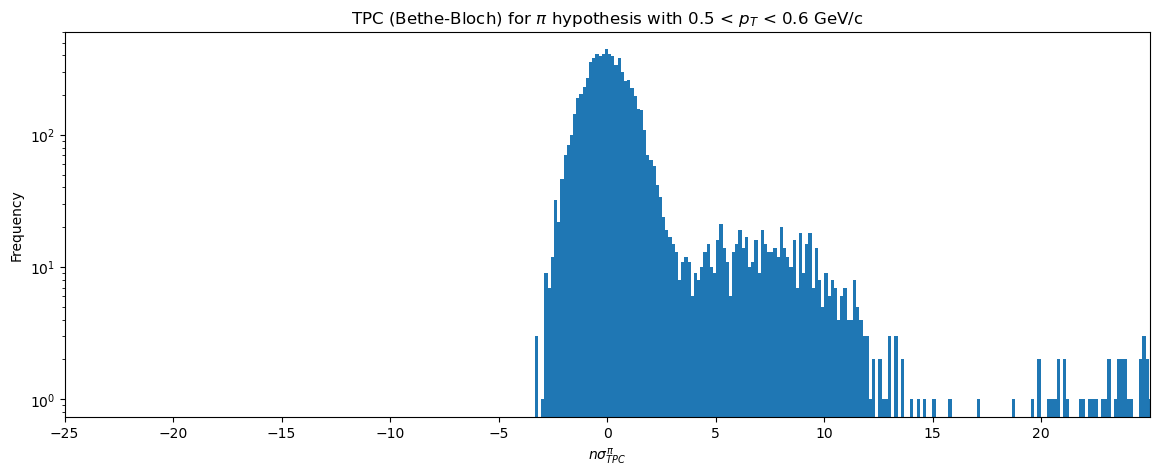

In [44]:
# data from one directory:
df_tpc = file["DF_2300238590827776/O2filtertrackextr"].arrays(["fPt","fNsigmaTPCpi"], library="pd")
df_tpc_filt = df_tpc[ (df_tpc['fPt'] > 0.5) & (df_tpc['fPt'] < 0.6) ]

# plotting:
fig, ax = plt.subplots(figsize=(14,5))
plt.hist(df_tpc_filt["fNsigmaTPCpi"], bins=1000, log=True)
ax.set_xlabel(r"$n\sigma^{\pi}_{TPC}$")
ax.set_ylabel("Frequency")
ax.set_title(r"TPC (Bethe-Bloch) for $\pi$ hypothesis with 0.5 < $p_{T}$ < 0.6 GeV/c")
ax.set_xlim( -25, 25 )
ax.set_xticks(np.arange(-25, 25, 5) )
plt.show()

### TPC $pi$ - filter  [0.5, 0.6]

In [56]:
# merging all directories:
names = file.keys(filter_name=r"*O2filtertrackextr")
pt_val    = [ file[item]["fPt"].array(library="np") for item in names]
sigma_val = [ file[item]["fNsigmaTPCpi"].array(library="np") for item in names]
all_pt_val    = np.concatenate(pt_val)
all_sigma_val = np.concatenate(sigma_val)
df = pd.DataFrame(np.array([all_pt_val, all_sigma_val]).T, columns=["fPt", "fNsigmaTPCpi"])
df_filt = df[ (df['fPt'] > 0.5) & (df['fPt'] < 0.6) & (df['fNsigmaTPCpi']<100) ]

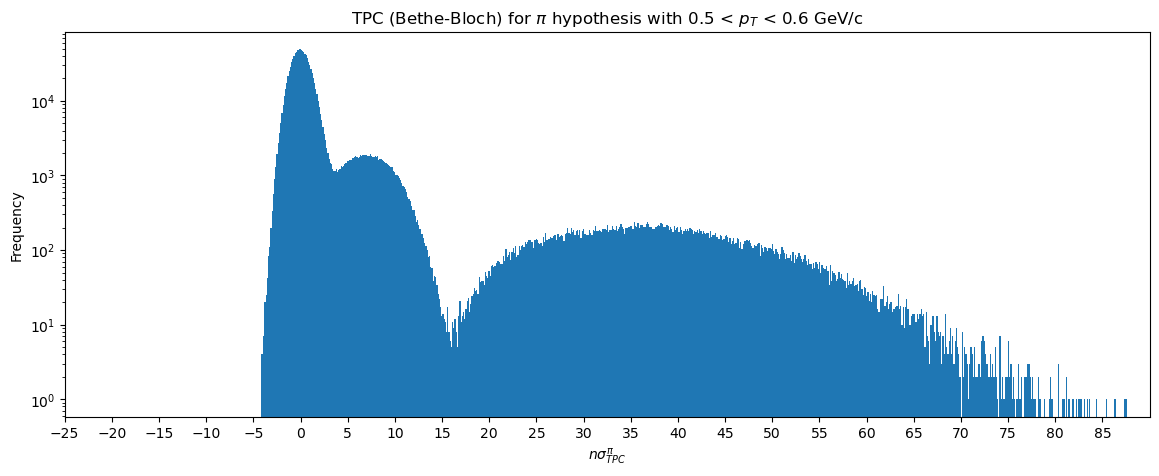

In [59]:
# plotting:
fig, ax = plt.subplots(figsize=(14,5))
plt.hist(df_filt["fNsigmaTPCpi"], bins=800, log=True)
ax.set_xlabel(r"$n\sigma^{\pi}_{TPC}$")
ax.set_ylabel("Frequency")
ax.set_title(r"TPC (Bethe-Bloch) for $\pi$ hypothesis with 0.5 < $p_{T}$ < 0.6 GeV/c")
ax.set_xlim( -25, 90 )
ax.set_xticks(np.arange(-25, 90, 5) )
plt.show()

### TPC $pi$ - filter  [2, 2.5]

In [60]:
# merging all directories:
names = file.keys(filter_name=r"*O2filtertrackextr")
pt_val    = [ file[item]["fPt"].array(library="np") for item in names]
sigma_val = [ file[item]["fNsigmaTPCpi"].array(library="np") for item in names]
all_pt_val    = np.concatenate(pt_val)
all_sigma_val = np.concatenate(sigma_val)
df = pd.DataFrame(np.array([all_pt_val, all_sigma_val]).T, columns=["fPt", "fNsigmaTPCpi"])
df_filt = df[ (df['fPt'] > 2) & (df['fPt'] < 2.5) ]   # & (df['fNsigmaTPCpi']<100) 

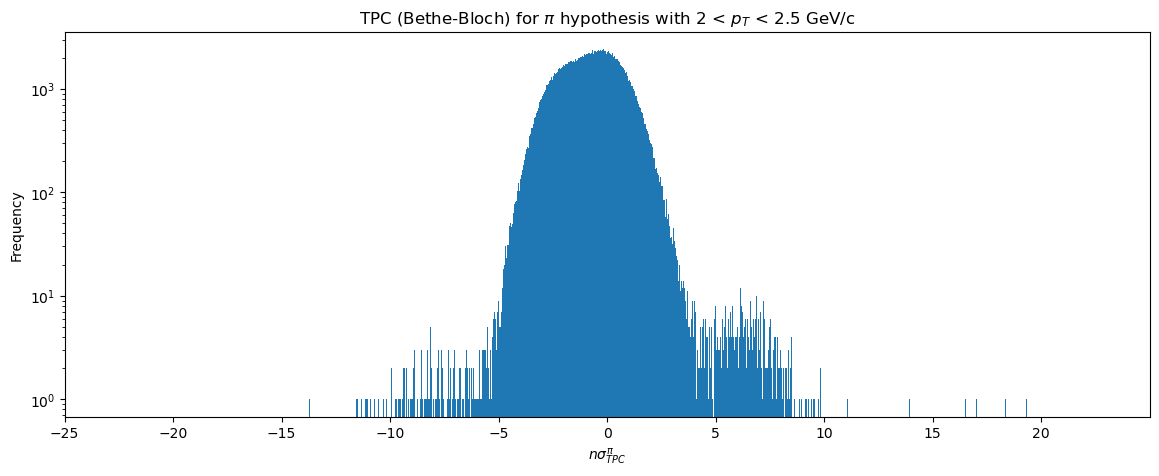

In [63]:
# plotting:
fig, ax = plt.subplots(figsize=(14,5))
plt.hist(df_filt["fNsigmaTPCpi"], bins=800, log=True)
ax.set_xlabel(r"$n\sigma^{\pi}_{TPC}$")
ax.set_ylabel("Frequency")
ax.set_title(r"TPC (Bethe-Bloch) for $\pi$ hypothesis with 2 < $p_{T}$ < 2.5 GeV/c")
ax.set_xlim( -25, 25 )
ax.set_xticks(np.arange(-25, 25, 5) )
plt.show()

### TPC $pi$ over $p_T$

In [84]:
# merging all directories:
names = file.keys(filter_name=r"*O2filtertrackextr")
pt_val    = [ file[item]["fPt"].array(library="np") for item in names]
sigma_val = [ file[item]["fNsigmaTPCpi"].array(library="np") for item in names]
all_pt_val    = np.concatenate(pt_val)
all_sigma_val = np.concatenate(sigma_val)
df = pd.DataFrame(np.array([all_pt_val, all_sigma_val]).T, columns=["fPt", "fNsigmaTPCpi"])
df_filt = df[ (df['fPt'] > 0) & (df['fPt'] < 10) & (df['fNsigmaTPCpi'] > -15) & (df['fNsigmaTPCpi'] < 25) ]

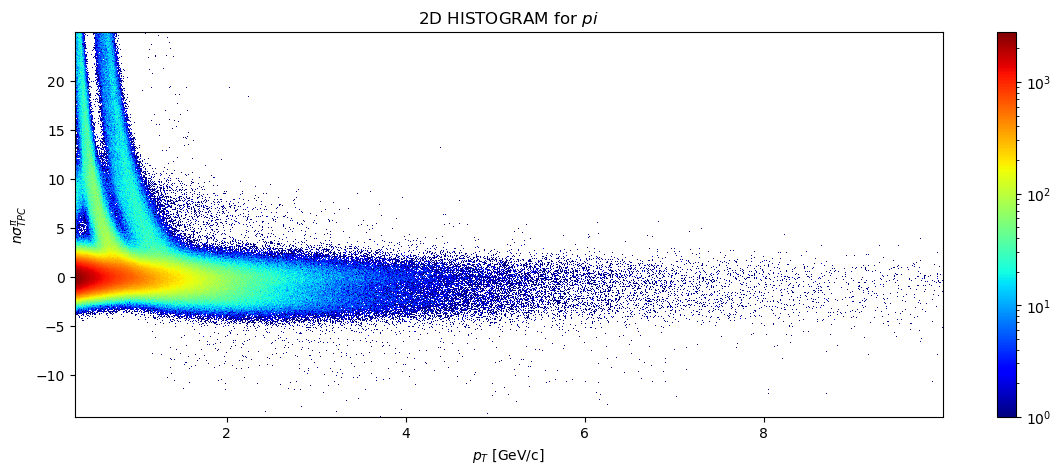

In [94]:
#plot:
fig, ax = plt.subplots(figsize=(14,5))
plt.hist2d(df_filt["fPt"], df_filt["fNsigmaTPCpi"], bins=1000, cmap='jet', norm=LogNorm() )
plt.colorbar()
ax.set_title(r'2D TPC HISTOGRAM for $pi$')
ax.set_xlabel(r"$p_{T}$ [GeV/c]")
ax.set_ylabel(r"$n\sigma^{\pi}_{TPC}$")
plt.show()

### TPC $K$ over $p_T$

In [89]:
# merging all directories:
names = file.keys(filter_name=r"*O2filtertrackextr")
pt_val    = [ file[item]["fPt"].array(library="np") for item in names]
sigma_val = [ file[item]["fNsigmaTPCka"].array(library="np") for item in names]
all_pt_val    = np.concatenate(pt_val)
all_sigma_val = np.concatenate(sigma_val)
df_k = pd.DataFrame(np.array([all_pt_val, all_sigma_val]).T, columns=["fPt", "fNsigmaTPCka"])
df_k_filt = df_k[ (df_k['fPt'] > 0) & (df_k['fPt'] < 10) & (df_k['fNsigmaTPCka'] > -15) & (df_k['fNsigmaTPCka'] < 25) ]

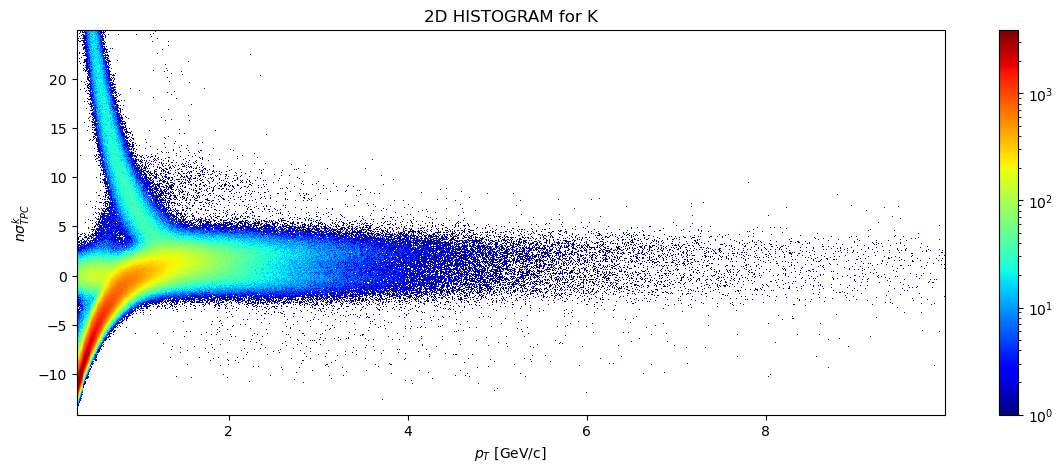

In [93]:
#plot:
fig, ax = plt.subplots(figsize=(14,5))
plt.hist2d(df_k_filt["fPt"], df_k_filt["fNsigmaTPCka"], bins=1000, cmap='jet', norm=LogNorm() )
plt.colorbar()
ax.set_title(r'2D TPC HISTOGRAM for K')
ax.set_xlabel(r"$p_{T}$ [GeV/c]")
ax.set_ylabel(r"$n\sigma^{k}_{TPC}$")
plt.show()

### TOF of $pi$ over $p_T$

In [98]:
# merging all directories:
names = file.keys(filter_name=r"*O2filtertrackextr")
pt_val    = [ file[item]["fPt"].array(library="np") for item in names]
sigma_val = [ file[item]["fNsigmaTOFpi"].array(library="np") for item in names]
all_pt_val    = np.concatenate(pt_val)
all_sigma_val = np.concatenate(sigma_val)
df = pd.DataFrame(np.array([all_pt_val, all_sigma_val]).T, columns=["fPt", "fNsigmaTOFpi"])
df_filt = df[ (df['fPt'] > 0) & (df['fPt'] < 10) & (df['fNsigmaTOFpi'] > -15) & (df['fNsigmaTOFpi'] < 25) ]

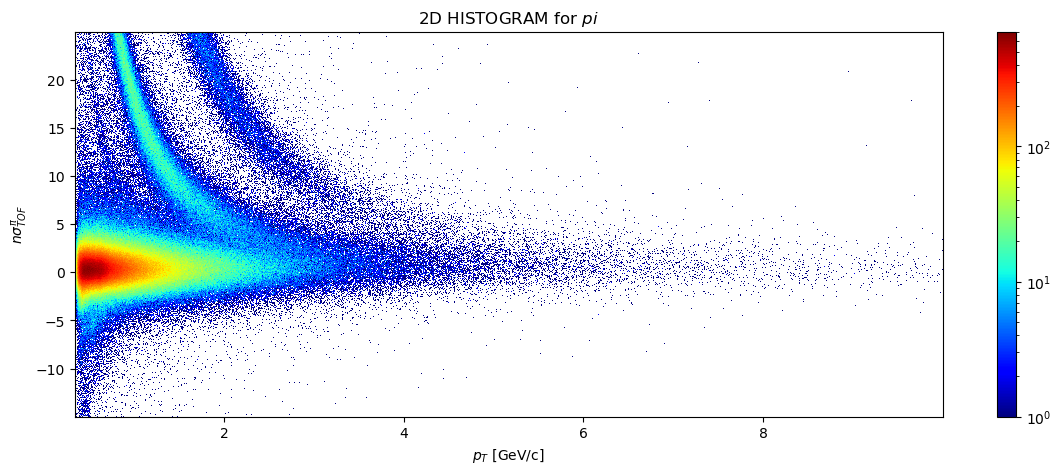

In [100]:
#plot:
fig, ax = plt.subplots(figsize=(14,5))
plt.hist2d(df_filt["fPt"], df_filt["fNsigmaTOFpi"], bins=1000, cmap='jet', norm=LogNorm() )
plt.colorbar()
ax.set_title(r'2D TOF HISTOGRAM for $pi$')
ax.set_xlabel(r"$p_{T}$ [GeV/c]")
ax.set_ylabel(r"$n\sigma^{\pi}_{TOF}$")
plt.show()

### TOF of $K$ over $p_T$

In [101]:
# merging all directories:
names = file.keys(filter_name=r"*O2filtertrackextr")
pt_val    = [ file[item]["fPt"].array(library="np") for item in names]
sigma_val = [ file[item]["fNsigmaTOFka"].array(library="np") for item in names]
all_pt_val    = np.concatenate(pt_val)
all_sigma_val = np.concatenate(sigma_val)
df_k = pd.DataFrame(np.array([all_pt_val, all_sigma_val]).T, columns=["fPt", "fNsigmaTOFka"])
df_k_filt = df_k[ (df_k['fPt'] > 0) & (df_k['fPt'] < 10) & (df_k['fNsigmaTOFka'] > -15) & (df_k['fNsigmaTOFka'] < 25) ]

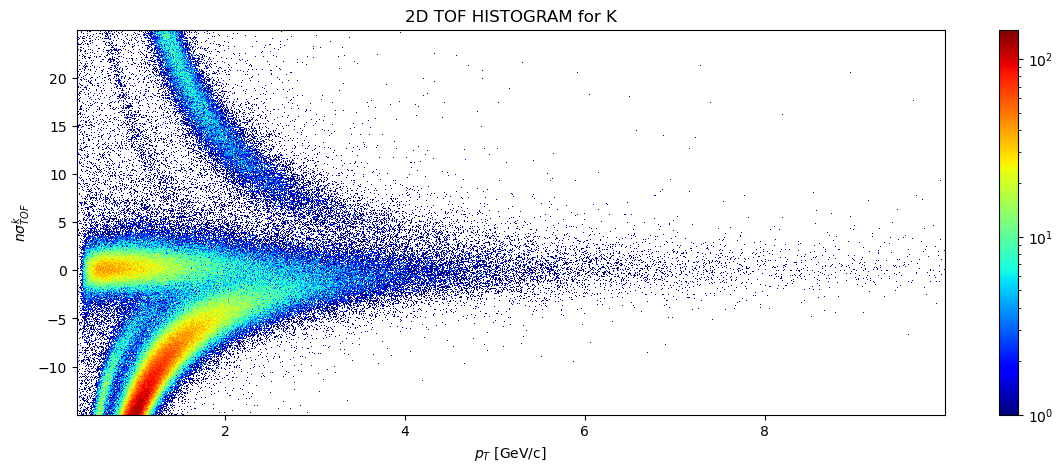

In [102]:
#plot:
fig, ax = plt.subplots(figsize=(14,5))
plt.hist2d(df_k_filt["fPt"], df_k_filt["fNsigmaTOFka"], bins=1000, cmap='jet', norm=LogNorm() )
plt.colorbar()
ax.set_title(r'2D TOF HISTOGRAM for K')
ax.set_xlabel(r"$p_{T}$ [GeV/c]")
ax.set_ylabel(r"$n\sigma^{k}_{TOF}$")
plt.show()

### TOF vs TPC

In [103]:
# merging all directories:
names = file.keys(filter_name=r"*O2filtertrackextr")
pt_val     = [ file[item]["fPt"].array(library="np") for item in names]
sigma_val  = [ file[item]["fNsigmaTPCka"].array(library="np") for item in names]
sigma2_val = [ file[item]["fNsigmaTOFka"].array(library="np") for item in names]
all_pt_val     = np.concatenate(pt_val)
all_sigma_val  = np.concatenate(sigma_val)
all_sigma2_val = np.concatenate(sigma2_val)
df_k = pd.DataFrame(np.array([all_pt_val, all_sigma_val, all_sigma2_val]).T, columns=["fPt", "fNsigmaTPCka", "fNsigmaTOFka"])

df_k_filt_1 = df_k[ (df_k['fPt'] > 0.9) & (df_k['fPt'] < 1) & (df_k['fNsigmaTPCka'] > -10) & (df_k['fNsigmaTPCka'] < 20)\
    & (df_k['fNsigmaTOFka'] > -50) & (df_k['fNsigmaTOFka'] < 50)]

df_k_filt_2 = df_k[ (df_k['fPt'] > 1.5) & (df_k['fPt'] < 1.7) & (df_k['fNsigmaTPCka'] > -5) & (df_k['fNsigmaTPCka'] < 9)\
    & (df_k['fNsigmaTOFka'] > -25) & (df_k['fNsigmaTOFka'] < 25)]

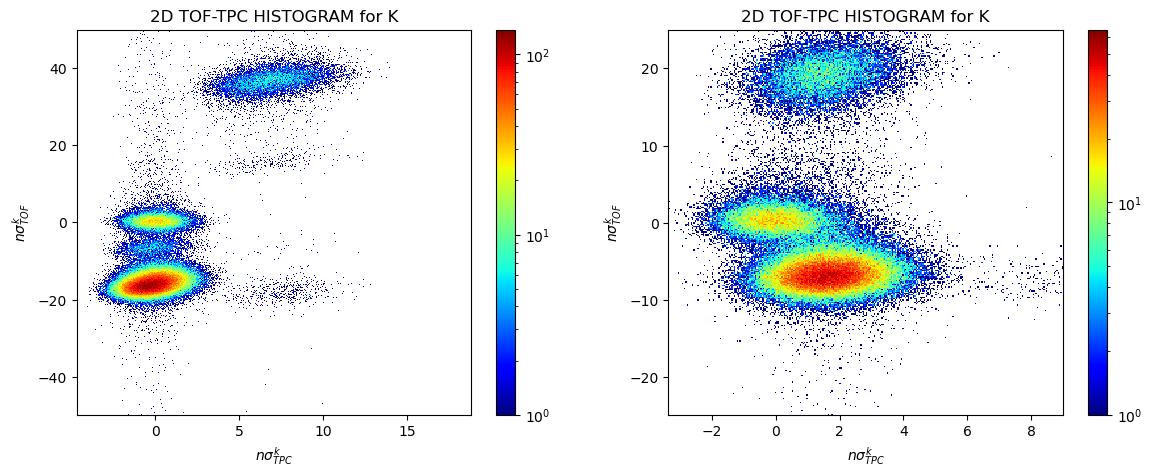

In [112]:
#plot:
fig, ax = plt.subplots(1,2, figsize=(14,5))
h1 = ax[0].hist2d(df_k_filt_1['fNsigmaTPCka'], df_k_filt_1["fNsigmaTOFka"], bins=500, cmap='jet', norm=LogNorm() )
plt.colorbar(h1[3])
ax[0].set_title(r'2D TOF-TPC HISTOGRAM for K')
ax[0].set_xlabel("$n\sigma^{k}_{TPC}$")
ax[0].set_ylabel(r"$n\sigma^{k}_{TOF}$")

h2 = ax[1].hist2d(df_k_filt_2['fNsigmaTPCka'], df_k_filt_2["fNsigmaTOFka"], bins=300, cmap='jet', norm=LogNorm() )
plt.colorbar(h2[3])
ax[1].set_title(r'2D TOF-TPC HISTOGRAM for K')
ax[1].set_xlabel("$n\sigma^{k}_{TPC}$")
ax[1].set_ylabel(r"$n\sigma^{k}_{TOF}$")

plt.show()

---

# EX 3 - CALCULATE dcaXY
calculate dcaXY variable from “local coordinates” (those of tracking reference system) and check your calculation comparing what you get with the available dcaXY variable:
We work in tracking system (so we have to rotate the coordinate of the PV that were in the global system):
$$dcaXY = d_0 = Y_{track} - Y_{PV}^{track} = fY - R \cdot fPos_Y $$

Memo: dcaXY = (signed) distance of closest approach in XY plane = track impact parameter ($d_0$) = distance between PCA and PV points in XY plane. Relation: dcaXY = Ytrack - YPV with YPV in tracking system gives proper sign convention

Memo: fIndexCollisions gives the position in the O2collision tree of the primary vertex (PV) to which the track is associated

#### STEPS
We're trying to recompute dcaXY from the local (tracking) coordinates and compare it to the fDcaXY value stored in O2filtertrackextr.
* $fY$: the track's Y coordinate in the tracking system, evaluated at the Point of Closest Approach (PCA).
* $fPos_Y$: the primary vertex Y position, but you must transform it to the tracking system before using it.

This gives a signed transverse impact parameter, positive if the track bends away from the vertex and negative otherwise, depending on the magnetic field and charge.

In [136]:
# retrieving data from all directories:
names_1 = file.keys(filter_name=r"*O2filtertrack")
names_2 = file.keys(filter_name=r"*O2filtertrackextr")
names_3 = file.keys(filter_name=r"*O2collision_001")
# load and concatenate all track and collision data (as numpy array)
fY     = np.concatenate([file[name]["fY"].array(library="np") for name in names_1])      # y coordinate of the PCA of PV
fAlpha = np.concatenate([file[name]["fAlpha"].array(library="np") for name in names_1])
f_idx  = np.concatenate([file[name]["fIndexCollisions"].array(library="np") for name in names_1])
fPosX  = np.concatenate([file[name]["fPosX"].array(library="np") for name in names_3])
fPosY  = np.concatenate([file[name]["fPosY"].array(library="np") for name in names_3])

# lookup PV coordinates for each track via fIndexCollisions
pvX = fPosX[f_idx]
pvY = fPosY[f_idx]
cos_a = np.cos(-fAlpha)
sin_a = np.sin(-fAlpha)
# x_rot = cos_a * pvX - sin_a * pvY    # unnecessary for our purpose
y_rot = sin_a * pvX + cos_a * pvY      # y coordinate of the PV in tracking system

# compute dcaXY:
dcaXY_computed = fY - y_rot

# compare to the known one:
fDcaXY = np.concatenate([file[name]["fDcaXY"].array(library="np") for name in names_2])
diff = dcaXY_computed - fDcaXY

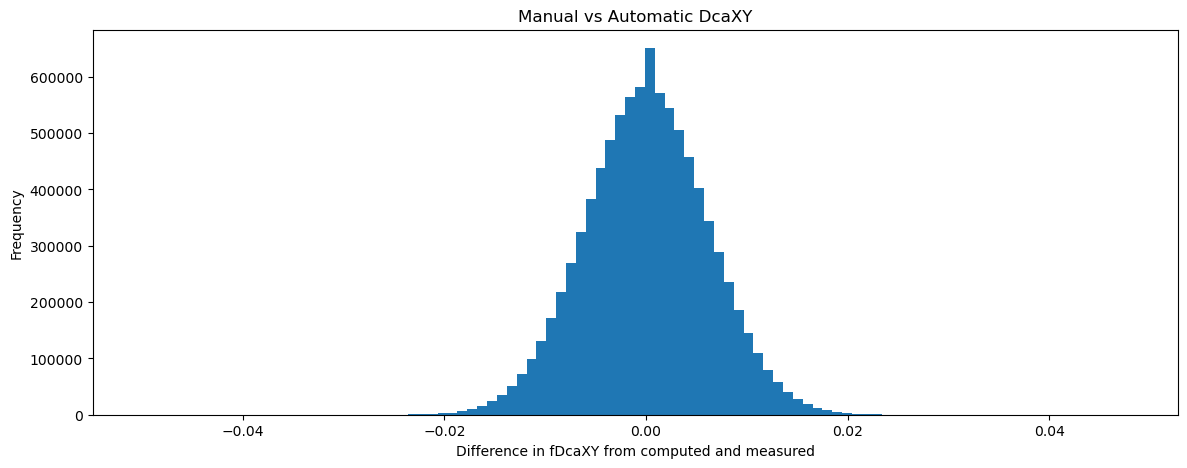

In [137]:
# plotting:
fig, ax = plt.subplots(figsize=(14,5))
plt.hist(diff, bins=100)
ax.set_xlabel("Difference in fDcaXY from computed and measured")
ax.set_ylabel("Frequency")
ax.set_title("Manual vs Automatic DcaXY")
plt.show()

---

# EX 4 - RESOLUTION OF dcaXY
- look at the dcaXY distribution in narrow pt intervals:
- take the rms of the distribution around the peak, i.e. calculate the rms’ that you get
when you restrict the distribution to (approximately) the range [mean -2.5 rms, mean
+2.5 rms]
    - alternatively: fit the distribution in a wider range (~5 rms) with a function
composed of a Gaussian term (for the peak) and symmetric exponential tails:
- plot rms’ (or the Gaussian sigma) as a function of pt.
You should get something like the figure on the right.
- repeat isolating pions, kaons, and protons

We're trying to measure how precisely we can reconstruct the distance of closest approach (DCA) of a particle's track to the primary vertex in the transverse plane (XY). The precision (resolution) of this quantity depends on the transverse momentum ($p_T$) of the track — this is what we're investigating.

A smaller DCA usually means the track came directly from the primary vertex (i.e. it's a "primary particle"). A large DCA can signal that the particle came from the decay of another particle, i.e. it is a secondary particle.

Steps:
1. We group the data into $p_T$ intervals, i.e. we divide the tracks into narrow intervals of $p_T$ (e.g., 0.2–0.4 GeV, 0.4–0.6 GeV, etc) because the DCA resolution changes with momentum, and we want to study this relationship.
2. For each interval, we analyze the DCAxy distribution, i.e. for each $p_T$ interval we take all dcaXY values of tracks in that $p_T$ range, we plot the distribution (a histogram), and we compute how wide the distribution is — this tells us the resolution. There are two main ways to measure this width: RMS in a restricted range around the peak (mean ± 2.5 × RMS). Fit with a Gaussian function (and possibly tails), and extract the Gaussian width σ.
3. Plot the result: Once you've measured the resolution (RMS or σ) for each $p_T$ bin, plot it: X-axis: the $p_T$ bin center Y-axis: the measured resolution. This gives a curve: DCA resolution vs transverse momentum
4. Repeat for different particle species: Different particles have different interactions in the detector, so their DCA resolution can differ. You repeat the analysis for: Pions Kaons Protons. To isolate them, use PID selection, like in abs(nSigmaTPC_pi) < 3.

In [4]:
# taking dcaXY from all directories:
names = file.keys(filter_name=r"*O2filtertrackextr")
dca_xy_values = [file[item]["fDcaXY"].array(library="np") for item in names]
pt_values     = [file[item]["fPt"].array(library="np") for item in names]
dca_xy = np.concatenate(dca_xy_values)
pt = np.concatenate(pt_values)
df = pd.DataFrame( np.array([dca_xy, pt]).T , columns=["fDcaXY", "fPt"])

In [5]:
# let's study the pt values:
df.describe()

,fDcaXY,fPt
count,9.126260e+06,9.126260e+06
mean,4.496107e-04,8.173382e-01
std,3.467755e-02,6.375364e-01
min,-4.999710e-01,3.000001e-01
25%,-2.395391e-03,4.312811e-01
50%,4.155461e-04,6.213890e-01
75%,3.251932e-03,9.727096e-01
max,4.999792e-01,8.575261e+01


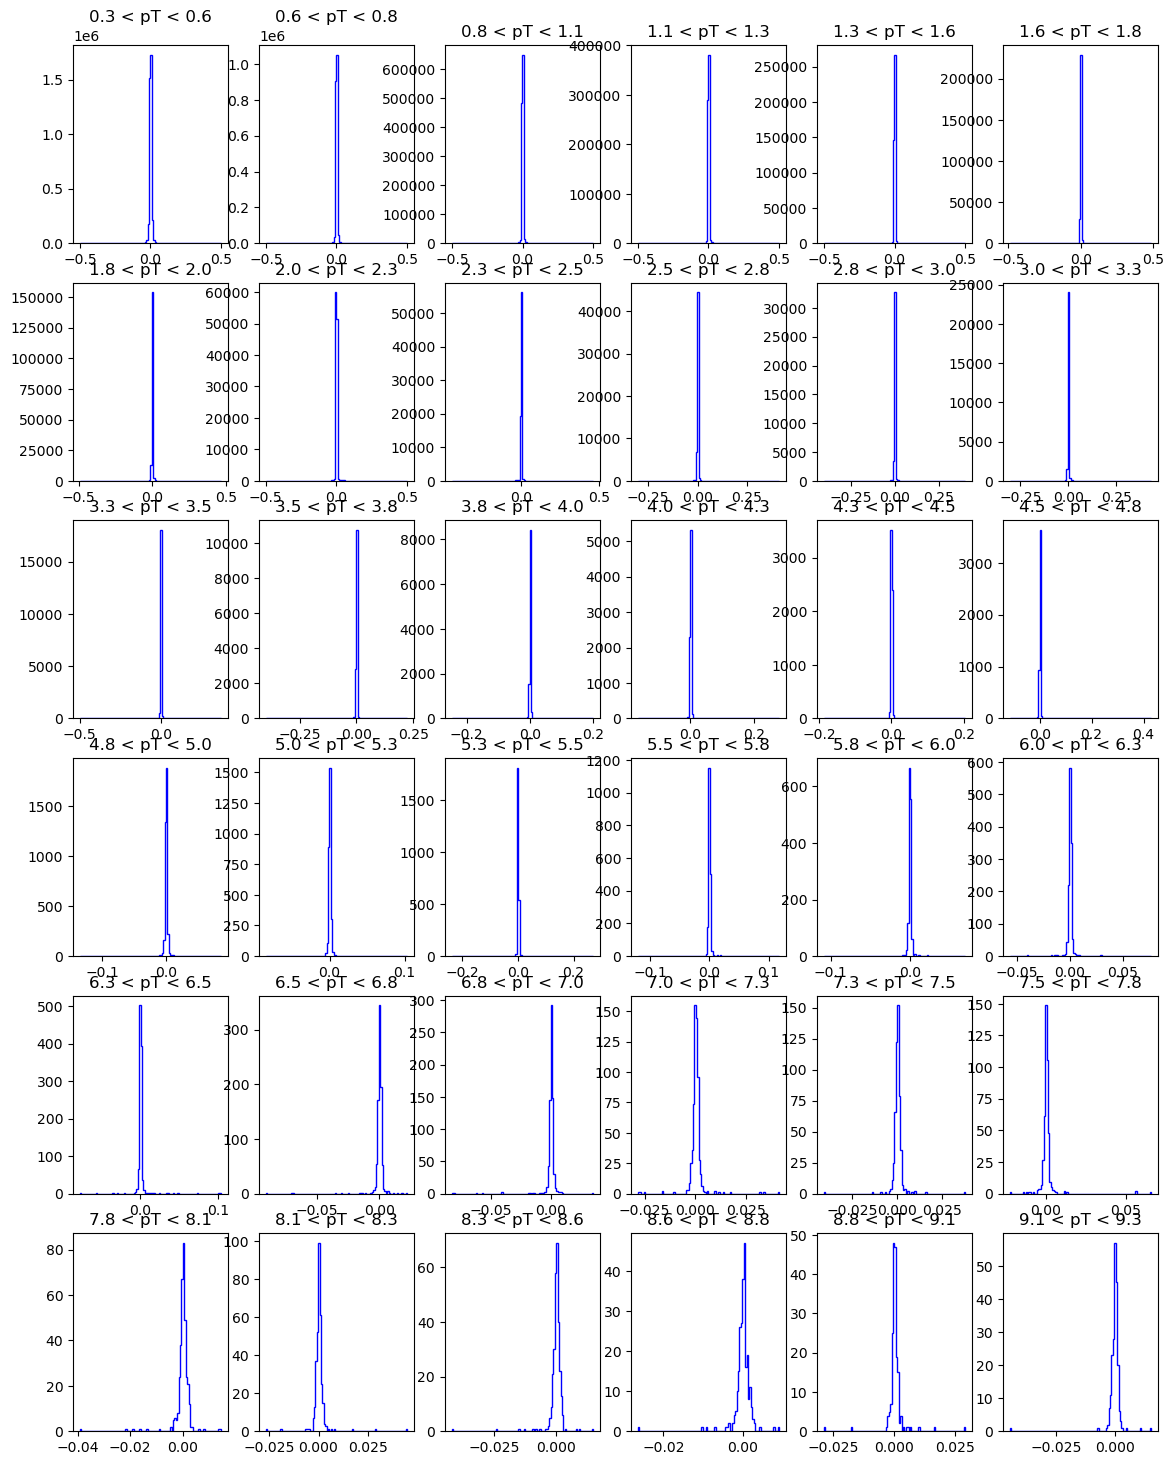

In [13]:
# let's divide pt values in intervals of width 0.1 for now:
fig, axs = plt.subplots(6,6, figsize=(14,18))
min_pt = 0.3                # minimum (start) of taking intervals, in GeV
step = 0.25                 # width of interval, in GeV
it = 0                      # iteration variable
x_pt = []                   # list for the pt values (middle of interval) in x axes
y_res = []                  # list for the values of resolutions at each pt interval


for i in range(6):
    for j in range(6):
        lower = min_pt + step*it
        upper = lower + step
        mask = (df['fPt'] > lower) & (df['fPt'] < upper)
        dca_in_interval = df.loc[mask, 'fDcaXY']

        # plotting:
        axs[i, j].hist(dca_in_interval, bins=100, histtype='step', color='blue')
        axs[i, j].set_title(f"{lower:.1f} < pT < {upper:.1f}")

        # computing resolution:
        mean = np.mean(dca_in_interval)
        std = np.std(dca_in_interval)
        tight_mask = (dca_in_interval >= mean - 2.5*std ) & (dca_in_interval <= mean + 2.5*std )  # restrict to ±2.5 std
        new_std = np.std( dca_in_interval[tight_mask] )
        new_mean = np.mean( dca_in_interval[tight_mask] )
        x_pt.append( (upper+lower)/2 )
        y_res.append( new_std *10**4 )    # conversion from cm to micron

        # iteration variable increase
        it += 1

Text(0.5, 1.0, '$DCA_{XY}$ resolution vs $p_T$')

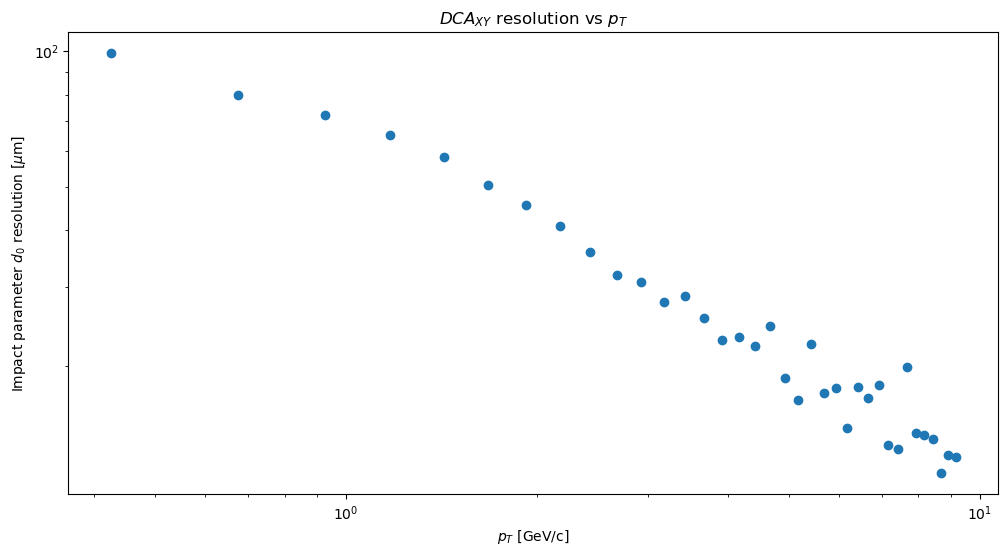

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x_pt, y_res)
ax.set_yscale('log') 
ax.set_xscale('log') 
ax.set_xlabel(r'$p_T$ [GeV/c]')
ax.set_ylabel(r'Impact parameter $d_0$ resolution [$\mu$m]')
ax.set_title(r'$DCA_{XY}$ resolution vs $p_T$')

### NOW FOR EACH PARTICLE
To isolate them, use PID selection, for example: `abs(nSigmaTPC_pi) < 3`

In [18]:
# TO DO

---

# EX 5 - $K_0$